```
  /$$$$$$  /$$   /$$ /$$$$$$$   /$$$$$$ 
 /$$__  $$| $$  | $$| $$__  $$ /$$__  $$
| $$  \__/| $$  | $$| $$  \ $$| $$  \ $$
|  $$$$$$ | $$  | $$| $$  | $$| $$  | $$
 \____  $$| $$  | $$| $$  | $$| $$  | $$
 /$$  \ $$| $$  | $$| $$  | $$| $$  | $$
|  $$$$$$/|  $$$$$$/| $$$$$$$/|  $$$$$$/
 \______/  \______/ |_______/  \______/ 


 @Author : Pierre Lague

 @Email : p.lague@sudogroup.fr

 @Date : 04/10/2024

```

# CLOUD BILL EXPLANATION (fields and values)

> @author Pierre Lague (Sudo Group)

This file aims to explain the various fields of the potential cloud billing files we might encounter during the development of our product. It won't be proposing any plots / models as it is not the purpose here (refer to my other notebooks for more "hands-on" experiments and methods to extract new features).

We will delve into the intricacies of these files, which can differ from one cloud provider to another.
For each field we will :
- define its meaning
- explain the possible values

## > MSFT AZURE CLOUD BILL


In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [280]:
azure_bill = pd.read_csv(r"C:\Users\Pierre LAGUE\Documents\SUDO\scripts\CLOUD_PROVIDER_BILL\data\azure_sample_10000.csv")
azure_bill.columns


Index(['BillingAccountId', 'BillingAccountName', 'BillingPeriodStartDate',
       'BillingPeriodEndDate', 'BillingProfileId', 'BillingProfileName',
       'AccountOwnerId', 'AccountName', 'SubscriptionId', 'SubscriptionName',
       '_Date', 'Product', 'PartNumber', 'MeterId', 'ServiceFamily',
       'MeterCategory', 'MeterSubCategory', 'MeterRegion', 'MeterName',
       'Quantity', 'EffectivePrice', 'Cost', 'UnitPrice', 'BillingCurrency',
       'ResourceLocation', 'AvailabilityZone', 'ConsumedService', 'ResourceId',
       'ResourceName', 'ServiceInfo1', 'ServiceInfo2', 'AdditionalInfo',
       'Tags', 'InvoiceSectionId', 'InvoiceSection', 'CostCenter',
       'UnitOfMeasure', 'ResourceGroup', 'ReservationId', 'ReservationName',
       'ProductOrderId', 'ProductOrderName', 'OfferId',
       'IsAzureCreditEligible', 'Term', 'PublisherName', 'PlanName',
       'ChargeType', 'Frequency', 'PublisherType', 'PayGPrice', 'PricingModel',
       'CostAllocationRuleName', 'benefitId', 'benefit

In [271]:
## setting up forecasting for Virtual Machines
azure_data_forecasting = azure_bill[["_Date", "Quantity", "MeterId", "Cost", "MeterCategory", "VCPUs", "ConsumedQty", "MeterName"]]
azure_data_forecasting

,_Date,Quantity,MeterId,Cost,MeterCategory,VCPUs,ConsumedQty,MeterName
0,02/29/2024,0.316673,8052cc55-9528-5cbd-973e-cf5f6c105dcf,0.009500,Virtual Machines,4,0.316673,F4s Spot
1,01/16/2024,0.316673,0d33bc3b-e1f6-5a90-bb57-9cf88f8434ad,0.015834,Virtual Machines,4,0.316673,DS12 v2 Spot
2,03/17/2024,3.758470,6d1be072-901e-42fa-934a-e3e452d8ca4c,2.251324,Virtual Machines,16,1.000000,D16 v3/D16s v3
4,01/24/2024,1.000000,5b1dd4f6-bc36-59f8-94f8-e5d5a594fa2e,0.000000,Virtual Machines,2,1.000000,D2ads v5
5,02/19/2024,0.633346,b93677d2-bafb-5570-bb2e-970117f1dbc2,0.076002,Virtual Machines,16,0.633346,E16d v4 Spot
...,...,...,...,...,...,...,...,...
8624,02/07/2024,24.000000,0f68ed30-d33d-4b1b-8533-f16ae059f71d,0.000000,Virtual Machines Licenses,8,1.000000,Standard Edition License
8625,02/25/2024,24.000000,0f68ed30-d33d-4b1b-8533-f16ae059f71d,0.000000,Virtual Machines Licenses,16,1.000000,Standard Edition License
8626,02/15/2024,24.000000,0f68ed30-d33d-4b1b-8533-f16ae059f71d,0.000000,Virtual Machines Licenses,8,1.000000,Standard Edition License
8627,03/06/2024,24.000000,0f68ed30-d33d-4b1b-8533-f16ae059f71d,0.000000,Virtual Machines Licenses,2,1.000000,Standard Edition License


In [273]:
# Assuming azure_bill is your DataFrame
def convert_to_datetime(df, label):
    # Convert date strings to datetime
    df.loc[df.index, label] = pd.to_datetime(df[label], format='%m/%d/%Y')
    return df

azure_data_forecasting.loc[azure_data_forecasting.index, "MeterName"] = azure_data_forecasting[azure_data_forecasting.loc[azure_data_forecasting.index, "MeterName"]=="vCore"]
azure_data_forecasting = convert_to_datetime(azure_data_forecasting, '_Date')
#azure_data_forecasting = azure_data_forecasting.dropna()
azure_data_forecasting = azure_data_forecasting.sort_values(by=["_Date"])
azure_data_forecasting


,_Date,Quantity,MeterId,Cost,MeterCategory,VCPUs,ConsumedQty,MeterName
4048,2024-01-01 00:00:00,24.000000,a81ea708-9fcd-4c1b-b2f7-aad96bf56cfe,3.3120,Virtual Machines,4,1.000000,NaN
1910,2024-01-01 00:00:00,24.000000,bc918723-c9b8-4d6b-8f99-c5e963135010,0.0000,Virtual Machines Licenses,16,1.000000,NaN
4595,2024-01-01 00:00:00,23.000000,1ab41620-5ffa-51b3-ac16-6416f9f747a9,2.6312,Virtual Machines,4,1.000000,NaN
1580,2024-01-01 00:00:00,1.000000,2bc051e5-ec72-59e7-a047-7431c8970d83,0.0000,Virtual Machines,4,1.000000,NaN
4387,2024-01-01 00:00:00,24.000000,a23cf6b4-ddd2-5289-aa2f-9bc69d5719b8,1.9608,Virtual Machines,2,1.000000,NaN
...,...,...,...,...,...,...,...,...
1259,2024-03-31 00:00:00,23.000000,7d80f2a5-1eff-40c3-8a9d-356d2c1a62ef,0.0000,Virtual Machines,2,1.000000,NaN
2467,2024-03-31 00:00:00,24.000000,695fe110-a2c2-57c2-85f1-6c74bdc9e971,5.4936,Virtual Machines,8,1.000000,NaN
2447,2024-03-31 00:00:00,0.500000,ae40716f-fddc-5fca-991b-277fa04e0336,0.0000,Virtual Machines,4,1.000000,NaN
1390,2024-03-31 00:00:00,0.983353,557f9ef1-011d-5bfe-81b4-0a36325dae62,0.0000,Virtual Machines,2,0.983353,NaN


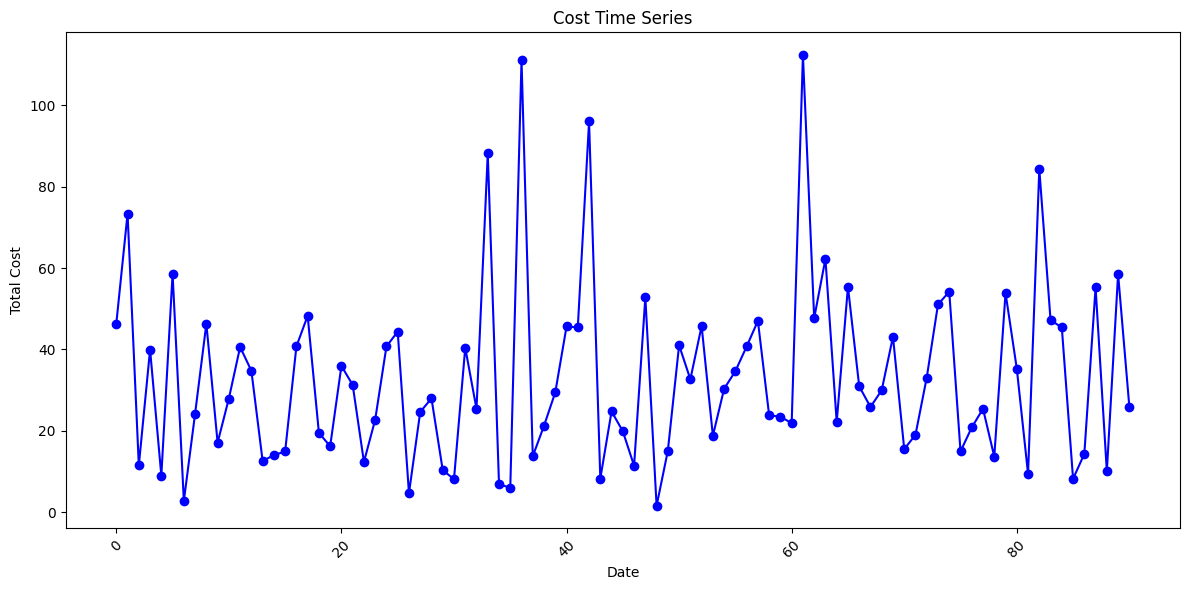

In [274]:
# Group by _Date and sum the Cost
daily_cost = azure_data_forecasting.groupby('_Date')['Cost'].sum().reset_index()
daily_cost.set_index("_Date")
# Plotting the time series
plt.figure(figsize=(12, 6))
plt.plot(daily_cost['Cost'], marker='o', linestyle='-', color='b')
plt.title('Cost Time Series')
plt.xlabel('Date')
plt.ylabel('Total Cost')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

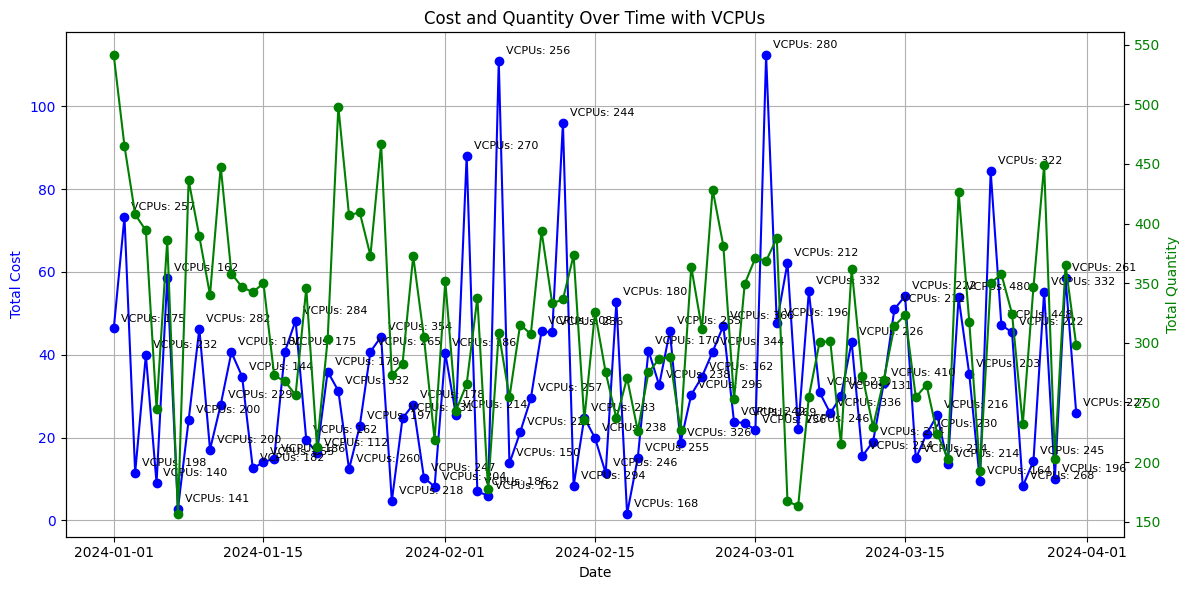

In [275]:
# Convert _Date column to datetime if not already done
azure_bill = convert_to_datetime(azure_data_forecasting, "_Date")

# Group by _Date and sum the Cost, Quantity, and VCPUs
daily_data = azure_data_forecasting.groupby('_Date')[['Cost', 'Quantity','VCPUs' ]].sum().reset_index()

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting Cost
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Cost', color='b')
ax1.plot(daily_data['_Date'], daily_data['Cost'], marker='o', linestyle='-', color='b', label='Cost')
ax1.tick_params(axis='y', labelcolor='b')

# Creating a second y-axis for Quantity
ax2 = ax1.twinx()
ax2.set_ylabel('Total Quantity', color='g')
ax2.plot(daily_data['_Date'], daily_data['Quantity'], marker='o', linestyle='-', color='g', label='Quantity')
ax2.tick_params(axis='y', labelcolor='g')

# Annotate with VCPUs
for i, row in daily_data.iterrows():
    ax1.annotate(f'VCPUs: {row["VCPUs"]}', 
                 xy=(row['_Date'], row['Cost']),
                 xytext=(5, 5),  # Offset text
                 textcoords='offset points',
                 fontsize=8,
                 color='black')

# Adding titles and grid
plt.title('Cost and Quantity Over Time with VCPUs')
plt.xticks(rotation=45)
ax1.grid()

# Show plot
plt.tight_layout()
plt.show()

```
VOCAB : 
Enterprise Agreement (EA)
Microsoft Client Agreement (MCA)
Pay-as-you-go Price (PaygPrice)
Meter : Identifier for the resource (A billing meter is used to determine the cost of using a specific service or resource in Azure. It helps calculate the amount you're charged based on the quantity of the resource consumed. The billing meter varies depending on the type of service or resource used.)
``` 


| Term                       | Account type                         | Description                                                                                  |
|----------------------------|--------------------------------------|----------------------------------------------------------------------------------------------|
| AccountName                | EA, pay-as-you-go                   | Display name of the EA enrollment account or pay-as-you-go billing account.                 |
| AccountOwnerId¹            | EA, pay-as-you-go                   | Unique identifier for the EA enrollment account or pay-as-you-go billing account.           |
| AdditionalInfo¹            | All                                  | Service-specific metadata, e.g., image type for a virtual machine, number of CPUs and consumed quantity.|
| AvailabilityZone           | External account                     | Zone in which the AWS service is deployed (for cross-cloud data).                          |
| BenefitId¹¹                | EA, MCA                             | Unique identifier for the purchased savings plan instance.                                  |
| BenefitName¹               | EA, MCA                             | Unique identifier for the purchased savings plan instance. Form a unique key with BenefitId                                 |
| BillingAccountId¹          | All                                  | Unique identifier for the root billing account.                                            |
| BillingAccountName          | All                                  | Name of the billing account.                                                                 |
| BillingCurrency             | All                                  | Currency associated with the billing account.                                              |
| BillingCurrencyCode         | All                                  | See BillingCurrency.                                                                        |
| BillingPeriod               | EA, pay-as-you-go                   | The billing period of the charge. Works only for Enterprice Agreement or pay-as-you-go billing account                                                        |
| BillingPeriodEndDate        | All                                  | The end date of the billing period.                                                         |
| BillingPeriodStartDate      | All                                  | The start date of the billing period.                                                       |
| BillingProfileId¹          | All                                  | Unique identifier of the EA enrollment or subscription.                                     |
| BillingProfileName          | All                                  | Name of the EA enrollment or subscription.                                                  |
| ChargeType                  | All                                  | Indicates whether the charge is Usage, Purchase, or Refund.                                 |
| ConsumedService             | All                                  | Name of the service associated with the charge.                                            |
| CostCenter¹¹               | EA, MCA                             | Cost center defined for tracking costs.                                                     |
| Cost     (FLAG)                   | EA, pay-as-you-go                   | Cost of the charge in billing currency before credits or taxes. Values at 0 may indicate that the subscription was cancelled or that the resources has not yet been used in the subscription plan. Manually calculate the cost by multiplying the Effective Price by the Quantity : Cost = (EffectivePrice) * (Quantity)                        |
| CostAllocationRuleName      | EA, MCA                             | Name of the Cost Allocation rule applicable to the record.                                  |
| CostInBillingCurrency       | EA, MCA                             | Cost of the charge in the billing currency before credits or taxes.                         |
| CostInPricingCurrency       | MCA                                 | Cost of the charge in the pricing currency before credits or taxes.                         |
| Currency                    | EA, pay-as-you-go                   | See BillingCurrency.                                                                        |
| CustomerName                | MPA                                  | Name of the Microsoft Entra tenant for the customer's subscription.                         |
| CustomerTenantId            | MPA                                  | Identifier of the Microsoft Entra tenant of the customer's subscription.                    |
| Date¹                       | All                                  | The usage or purchase date of the charge.                                                  |
| EffectivePrice² ³          | All                                  | Actual rate paid per unit for a given product or service. Values at 0 may indicate that the subscription was cancelled or that the resources has not yet been used in the subscription plan                                   |
| ExchangeRateDate            | MCA                                 | Date the exchange rate was established.                                                    |
| ExchangeRatePricingToBilling | MCA                                 | Exchange rate for converting pricing currency to billing currency.                          |
| Frequency                   | All                                  | Indicates if a charge is OneTime, Recurring, or UsageBased.                                |
| InvoiceId                   | pay-as-you-go, MCA                  | Unique document ID listed on the invoice PDF.                                              |
| InvoiceSection              | MCA                                  | See InvoiceSectionName.                                                                     |
| InvoiceSectionId¹          | EA, MCA                             | Unique identifier for the EA department or MCA invoice section.                            |
| InvoiceSectionName          | EA, MCA                             | Name of the EA department or MCA invoice section.An invoice section represents a grouping of costs in your invoice. An invoice section is automatically created for each billing profile in your account. You can create more sections to organize your costs based on your needs. Each invoice section is shown on the invoice with the charges incurred that month.|
| IsAzureCreditEligible       | All                                  | Indicates if the charge is eligible to be paid using Azure credits.                         |
| Location                    | MCA                                  | Normalized location to resolve region name inconsistencies.                                 |
| MeterCategory               | All                                  | Classification category for the meter (e.g., Cloud services, Networking, VM, Storage).                   |
| MeterId¹                   | All                                  | Unique identifier for the meter.                                                           |
| MeterName                   | All                                  | Name of the meter.                                                                          |
| MeterRegion                 | All                                  | Azure region associated with the meter.                                                    |
| MeterSubCategory            | All                                  | Subclassification category for the meter. (specific models of VM or storage units etc.)                                                 |
| OfferId¹                   | EA, pay-as-you-go                   | Name of the Azure offer.                                                                     |
| pay-as-you-goPrice² ³      | All                                  | Market price for a given product or service.                                               |
| PartnerEarnedCreditApplied  | MPA                                  | Indicates if partner earned credit was applied.                                            |
| PartnerEarnedCreditRate     | MPA                                  | Rate of discount applied if there's a partner earned credit (PEC).                          |
| PartnerName                 | MPA                                  | Name of the partner Microsoft Entra tenant.                                                |
| PartnerTenantId             | MPA                                  | Identifier for the partner's Microsoft Entra tenant.                                      |
| PartNumber¹                 | EA, pay-as-you-go                   | Identifier for specific meter pricing.                                                      |
| PlanName                    | EA, pay-as-you-go                   | Marketplace plan name.                                                                       |
| PreviousInvoiceId           | MCA                                  | Reference to the original invoice if the line item is a refund.                            |
| PricingCurrency             | MCA                                  | Currency used for rating based on negotiated prices.                                       |
| PricingModel                | All                                  | Identifier indicating how the meter is priced (OnDemand, Reservation, etc.).               |
| Product                     | All                                  | Name of the product.                                                                        |
| ProductId¹                 | MCA                                  | Unique identifier for the product.                                                         |
| ProductOrderId              | All                                  | Unique identifier for the product order.  Every reservation purchase and usage record has two associated IDs: ReservationId and ProductOrderId                                                 |
| ProductOrderName            | All                                  | Unique name for the product order.                                                          |
| Provider                    | MCA                                  | Identifier for product category or Line of Business.                                       |
| PublisherId                 | MCA                                  | ID of the publisher, available after invoice generation.                                    |
| PublisherName               | All                                  | Name of the publisher. For first-party services, it should be Microsoft.                   |
| PublisherType               | All                                  | Supported values: Microsoft, Azure, AWS, Marketplace.                                      |
| Quantity³                  | All                                  | Number of units used by the product or service.                                            |
| ResellerName                | MPA                                  | Name of the reseller associated with the subscription.                                      |
| ResellerMpnId              | MPA                                  | ID for the reseller associated with the subscription.                                       |
| ReservationId¹              | EA, MCA                             | Unique identifier for the purchased reservation instance. Every reservation purchase and usage record has two associated IDs: ReservationId and ProductOrderId                               |
| ReservationName              | EA, MCA                             | Name of the purchased reservation instance.                                                 |
| ResourceGroup               | All                                  | Name of the resource group the resource is in.                                             |
| ResourceId¹                 | All                                  | Unique identifier of the Azure Resource Manager resource.                                   |
| ResourceLocation¹           | All                                  | Azure region where the resource is deployed.                                               |
| ResourceName                | EA, pay-as-you-go                   | Name of the resource. Not all charges come from deployed resources.                         |
| ResourceType                | MCA                                  | Type of resource instance.                                                                    |
| RoundingAdjustment          | EA, MCA                             | Represents rounding errors during cost calculation.                                         |
| ServiceFamily               | MCA                                  | Service family that the service belongs to.                                               |
| ServiceInfo1                | All                                  | Service-specific metadata.                                                                  |
| ServiceInfo2                | All                                  | Legacy field with optional service-specific metadata.                                       |
| ServicePeriodEndDate        | MCA                                  | End date of the rating period that defined pricing.                                        |
| ServicePeriodStartDate      | MCA                                  | Start date of the rating period that defined pricing.                                      |
| SubscriptionId¹            | All                                  | Unique identifier for the Azure subscription.                                               |
| SubscriptionName            | All                                  | Name of the Azure subscription.                                                             |
| Tags¹                       | All                                  | Tags assigned to the resource for cost allocation.                                         |
| Term                        | All                                  | Displays the term for the validity of the offer.                                          |
| UnitOfMeasure               | All                                  | Unit of measure for billing for the service.                                               |
| UnitPrice² ³                | All                                  | Price inclusive of negotiated discounts on the market price.                                |



### Explanation of Relevant Features for Analysis



1. **Cost and EffectiveCost, EffectivePrice, UnitPrice, Quantity, PaygPrice**: 
   - Useful for understanding overall expenses and how they translate across different billing periods.
   - Analysis can help identify trends in spending, assess budget adherence, and inform cost-saving strategies.
   - Inisight about service plan and discounts (and when to use then) payasugo ->associated to effective price and unit price

2. **BillingPeriodStartDate, and BillingPeriodEndDate**:
   - These fields enable time-based analysis of costs, allowing for the identification of patterns and anomalies over time.

3. **Date, Qty**:
      - TODO : verify that ab["Date"][i] + Quantity.days[i] < ab["Date"][i+1]

3. **ChargeType**: 
   - Analysis can differentiate between usage, purchases, and refunds to better understand expense types and their implications on budget management.

4. **ConsumedService**: 
   - Helps in identifying which services are generating costs, enabling targeted optimizations and service evaluations.

5. **CostCenter**: 
   - Allows for departmental analysis of costs, assisting organizations in tracking expenses related to specific teams or projects.

6. **Tags**: 
   - Tags facilitate internal chargebacks and help in grouping costs by project or department, supporting detailed financial analyses.

7. **EffectivePrice and UnitPrice, PayGPrice**: 
   - Important for analyzing the actual cost against budgeted amounts, providing insights into pricing strategies and potential savings.

8. **MeterCategory and MeterRegion**:
   - Useful for regional analysis of usage and cost distribution, which can inform strategic decisions on resource

9. **Additionnal Info [Consumed Quantity] [VCPUs]**:  
   - Useful to assess the power consumption per hour and find correlations between the cost and the number of CPUs used.
   - Can be useful to map where the VM with the most CPUs are located in the world (link with MeterRegion)

10. **MeterRegion, ResourceRegion(greenit) and Location**:(the only meterId that has no missing values with Location are Virtual Machines
      - Useful to map where services are from and where they are deployed
      - Can display interesting insight on the prefered locations of the energy-demanding resources (WEU, NA etc...)

11. **InvoiceSection and InvoiceName**:
      - Identifiers on where the resource is being used in your ogranization according to the Enterprise Agreement (EA)
      - Can be used to map how the resources are used in the organizations that use certain type of billing plan.

# VCORE ANALYSIS

> We're going to use the following columns for vCore analysis
- *BillingPeriodStartDate* : time index for time seris modelling
- *Cost* : our TARGET VARIABLE for cost prediction (regression)
- *UnitPrice* : unit price of the service per unit of measure
- *Quantity* : Can be a target for regression/prediction as well depending on the problem
- *EffectivePrice* : effective price of the resource
- *ResourceGroup* : our TARGET when it comes to multilabel classification
